In [1]:
# https://www.kaggle.com/code/namanmanchanda/rnn-in-pytorch

In [2]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = torch.linspace(0,799,800)

In [4]:
# def f(t):
#     return np.sin(2*np.pi*t / 30) * np.log(t) / 2 + t / 100

In [5]:
def f(t):
    return np.cos(2*np.pi*t / 30) * np.sin(2*np.pi*t / 120)

In [6]:
y = f(x)

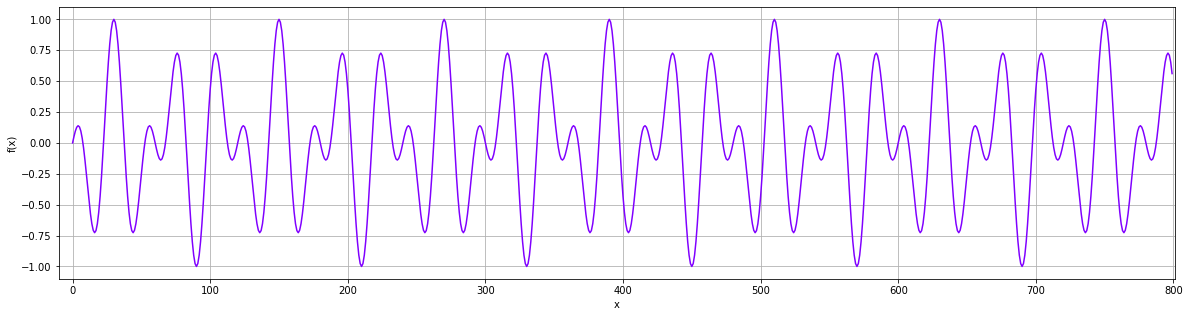

In [7]:
plt.figure(figsize=(20, 5))
plt.xlim(-10, 801)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(y.numpy(),color='#8000ff')
plt.show()

In [8]:
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

##### 3.1.1 Plotting the training/testing set

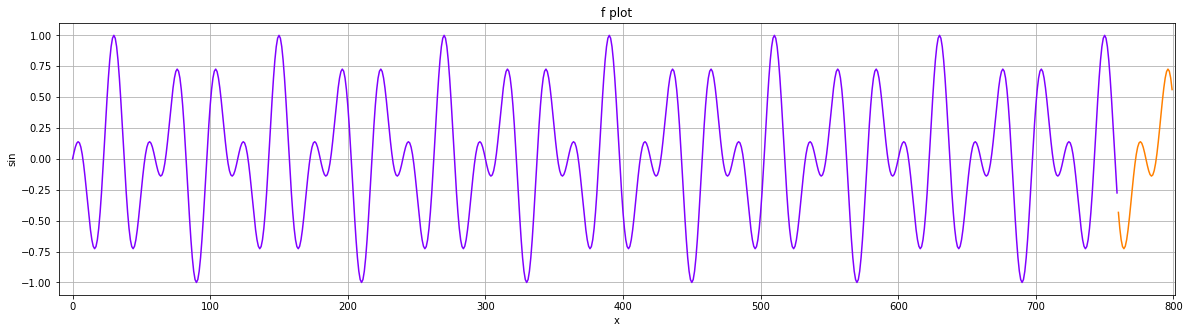

In [9]:
plt.figure(figsize=(20, 5))
plt.xlim(-10,801)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("sin")
plt.title("f plot")
plt.plot(train_set.numpy(),color='#8000ff')
plt.plot(range(760,800),test_set.numpy(),color="#ff8000")
plt.show()

In [10]:
def input_data(seq, ws):
    out = []
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window, label))
        
    return out

In [11]:
window_size = 40
train_data = input_data(train_set, window_size)
len(train_data)

720

In [12]:
train_data[0]

(tensor([ 0.0000,  0.0512,  0.0955,  0.1266,  0.1391,  0.1294,  0.0955,  0.0375,
         -0.0425, -0.1403, -0.2500, -0.3644, -0.4755, -0.5749, -0.6545, -0.7071,
         -0.7269, -0.7100, -0.6545, -0.5612, -0.4330, -0.2753, -0.0955,  0.0976,
          0.2939,  0.4830,  0.6545,  0.7991,  0.9085,  0.9768,  1.0000,  0.9768,
          0.9085,  0.7991,  0.6545,  0.4830,  0.2939,  0.0976, -0.0955, -0.2753]),
 tensor([-0.4330]))

# LSTM

In [15]:
class LSTM(nn.Module):
    
    def __init__(self,input_size = 1, hidden_size = 50, out_size = 1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, out_size)
        self.hidden = (torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size))
    
    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]

#### 4.2 Model Instantiation <a id = 11></a>

In [16]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

##### 4.2.1 Printing the model

In [17]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

#### 4.3 Training <a id = 12></a>

During training, I'm visualising the prediction process for the test data on the go. It will give a better understanding of how the training is being carried out in each epoch. The training sequence is represented in <span style="color:#8000ff">purple</span> while the predicted sequence in represented in <span style="color:#ff8000">orange</span>.

Epoch 0 Loss: 0.14424611628055573
Performance on test range: 0.18400654196739197


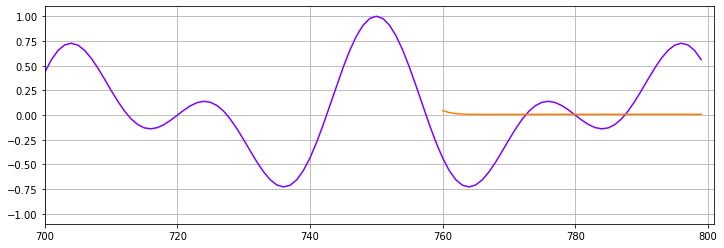

Epoch 1 Loss: 0.00037884560879319906
Performance on test range: 0.21235291659832


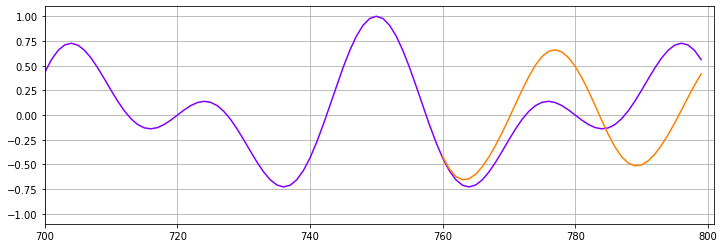

Epoch 2 Loss: 6.500409654108807e-05
Performance on test range: 0.38225698471069336


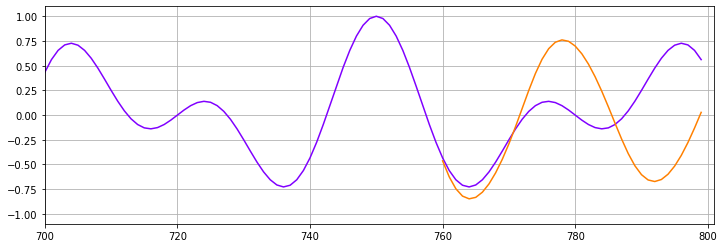

Epoch 3 Loss: 0.00024012927315197885
Performance on test range: 0.4424157738685608


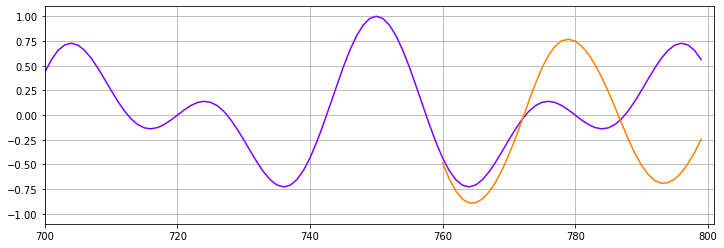

Epoch 4 Loss: 0.001212853123433888
Performance on test range: 0.416664183139801


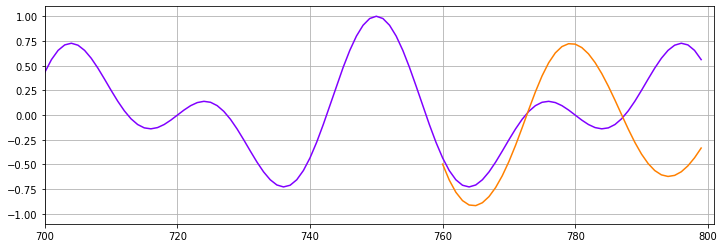

Epoch 5 Loss: 0.0024661864154040813
Performance on test range: 0.16012166440486908


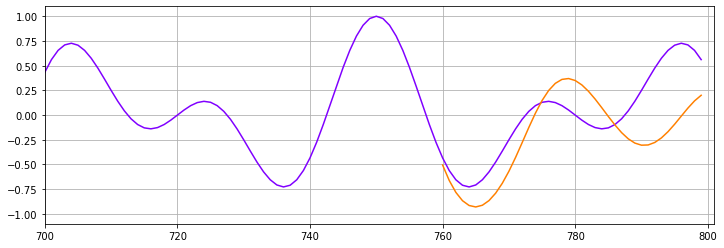

Epoch 6 Loss: 0.005699171684682369
Performance on test range: 0.12335588783025742


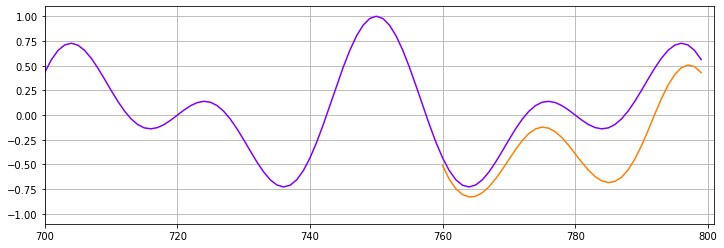

Epoch 7 Loss: 0.0007338171126320958
Performance on test range: 0.035787589848041534


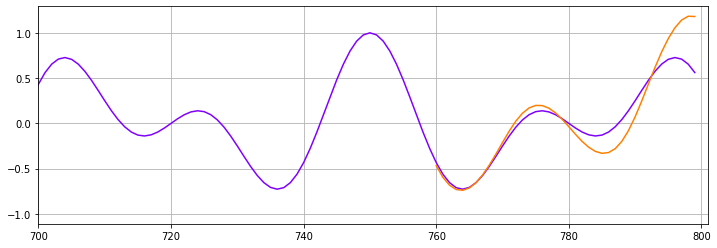

Epoch 8 Loss: 0.0025275724474340677
Performance on test range: 0.011643366888165474


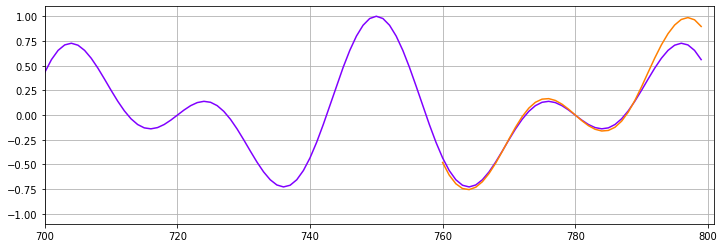

Epoch 9 Loss: 6.736158684361726e-05
Performance on test range: 0.04516492038965225


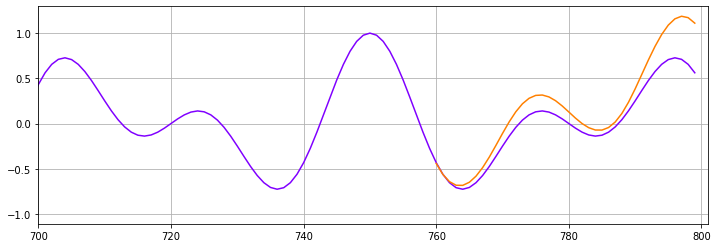

Epoch 10 Loss: 0.002775366185232997
Performance on test range: 0.026780489832162857


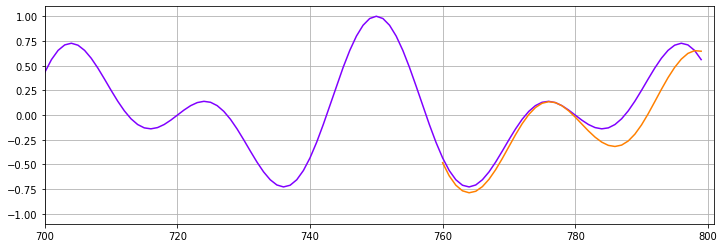

Epoch 11 Loss: 0.00020211855007801205
Performance on test range: 0.001765515306033194


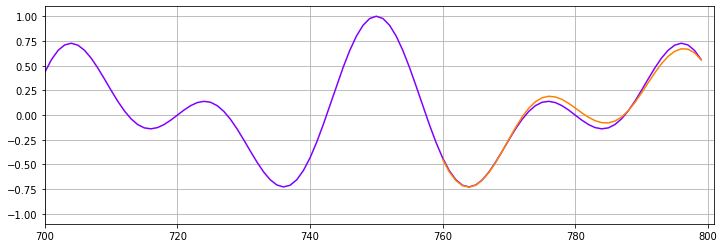

Epoch 12 Loss: 0.004616721998900175
Performance on test range: 0.08424054086208344


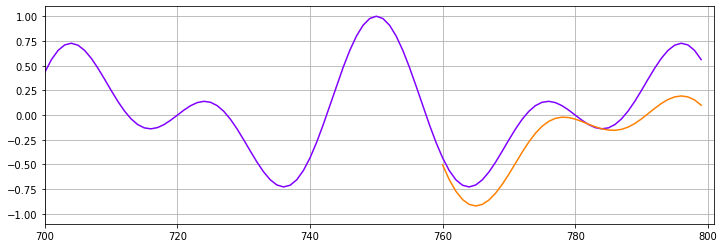

Epoch 13 Loss: 7.200961590569932e-06
Performance on test range: 0.016844116151332855


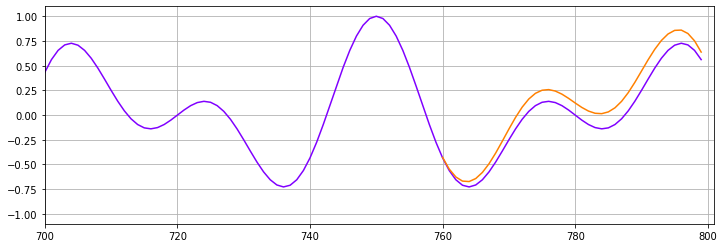

Epoch 14 Loss: 6.364501587086124e-06
Performance on test range: 0.14738337695598602


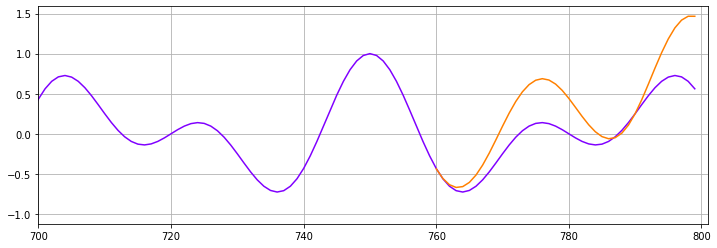

Epoch 15 Loss: 0.00037111021811142564
Performance on test range: 0.0036582406610250473


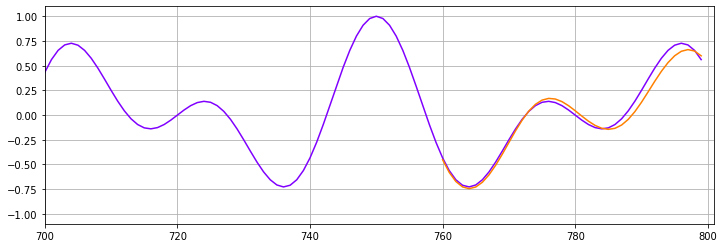

Epoch 16 Loss: 0.0001836246665334329
Performance on test range: 0.0021645515225827694


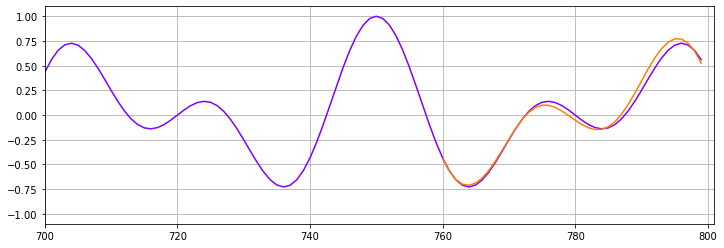

Epoch 17 Loss: 0.0013941354118287563
Performance on test range: 0.18850170075893402


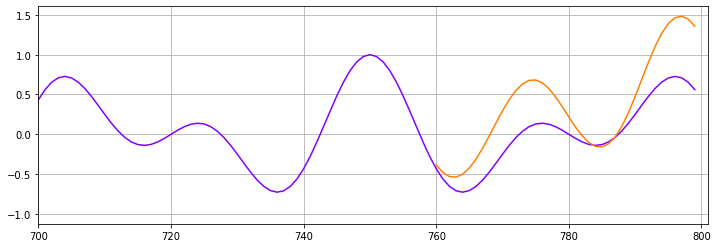

Epoch 18 Loss: 0.0005716703017242253
Performance on test range: 0.06963495165109634


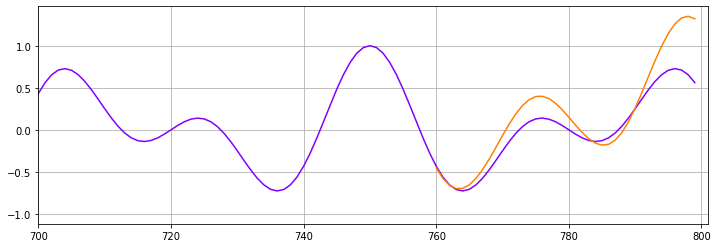

Epoch 19 Loss: 0.0019056712044402957
Performance on test range: 0.0508992001414299


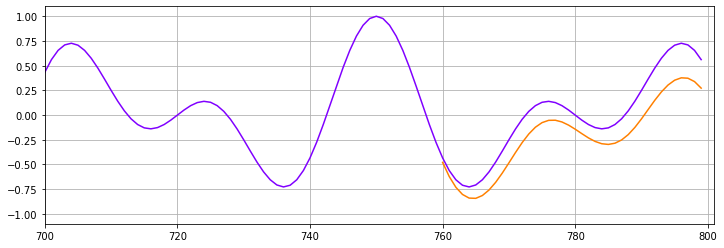

In [18]:
epochs = 20
future = 40

for i in range(epochs):
    
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                       torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    print(f"Epoch {i} Loss: {loss.item()}")
    
    preds = train_set[-window_size:].tolist()
    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                           torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
        
    loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
    print(f"Performance on test range: {loss}")
    
    plt.figure(figsize=(12,4))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.numpy(),color='#8000ff')
    plt.plot(range(760,800),preds[window_size:],color='#ff8000')
    plt.show()